In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from wrangle_nflx import wrangle_nflx

In [2]:
nflx = wrangle_nflx("NFLX_stock_data.csv")
nflx.info()
nflx.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2727 entries, 2015-03-16 to 2026-01-15
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    2727 non-null   float64
 1   High     2727 non-null   float64
 2   Low      2727 non-null   float64
 3   Open     2727 non-null   float64
 4   Volume   2727 non-null   float64
 5   Returns  2727 non-null   float64
 6   Vol_21   2727 non-null   float64
 7   Vol_30   2727 non-null   float64
 8   MA_10    2727 non-null   float64
 9   MA_50    2727 non-null   float64
 10  Lag_1    2727 non-null   float64
 11  Lag_5    2727 non-null   float64
dtypes: float64(12)
memory usage: 277.0 KB


,Close,High,Low,Open,Volume,Returns,Vol_21,Vol_30,MA_10,MA_50,Lag_1,Lag_5
Date,,,,,,,,,,,,
2015-03-16,6.028143,6.154714,5.962000,6.154714,267960000.0,-0.037477,0.016660,0.016735,6.422600,6.071114,6.262857,6.366143
2015-03-17,5.978857,6.069429,5.938429,5.971286,184282000.0,-0.008176,0.015731,0.016780,6.342329,6.090994,6.028143,6.215143
2015-03-18,6.044571,6.065000,5.930000,5.973857,146349000.0,0.010991,0.015856,0.015418,6.275686,6.117263,5.978857,6.288429
2015-03-19,6.074429,6.121143,6.025571,6.046000,114499000.0,0.004940,0.015614,0.015189,6.215057,6.145749,6.044571,6.404571
2015-03-20,6.118571,6.178571,6.089571,6.133714,136416000.0,0.007267,0.015826,0.015272,6.178171,6.174634,6.074429,6.262857


In [4]:
nflx.describe()

,Close,High,Low,Open,Volume,Returns,Vol_21,Vol_30,MA_10,MA_50,Lag_1,Lag_5
count,2727.000000,2727.000000,2727.000000,2727.000000,2.727000e+03,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,41.277599,41.851520,40.671953,41.270610,8.318587e+07,0.001336,0.024455,0.024836,41.140563,40.478608,41.247607,41.125691
std,28.601643,28.915103,28.262872,28.602260,7.680342e+07,0.026862,0.011174,0.010325,28.532755,28.125555,28.595459,28.566901
min,5.901714,5.960714,5.846429,5.876857,1.144000e+07,-0.351166,0.008673,0.009429,6.007557,6.071114,5.901714,5.901714
25%,18.750999,18.982500,18.424500,18.673500,3.905100e+07,-0.011232,0.015967,0.016853,18.616450,18.755550,18.739500,18.689500
50%,35.521000,36.095001,34.929001,35.500000,6.014200e+07,0.000422,0.021141,0.022977,35.444901,35.256020,35.506001,35.460999
75%,52.572001,53.466501,51.846500,52.588499,9.897700e+07,0.014086,0.030263,0.030710,52.330949,51.695110,52.559500,52.485500
max,133.912994,134.115005,132.121002,133.822998,1.333875e+09,0.190281,0.087239,0.075913,129.730200,123.340180,133.912994,133.912994


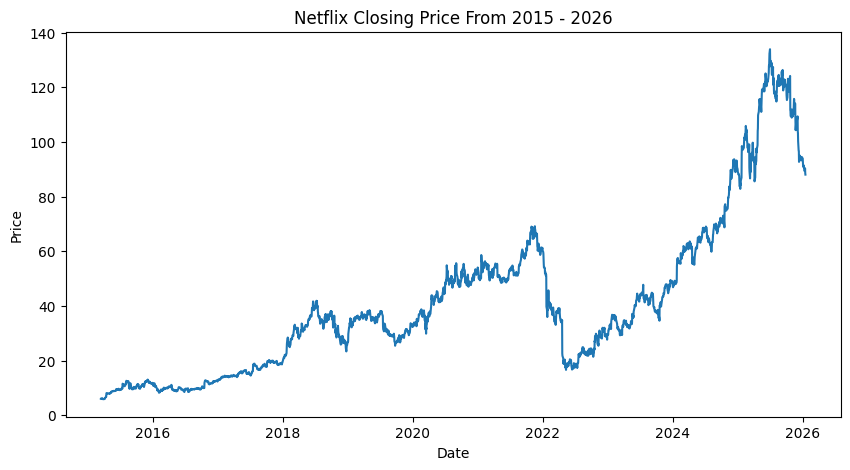

In [5]:
#Trend of closing price
plt.figure(figsize=(10, 5))
plt.plot(nflx.index, nflx["Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Netflix Closing Price From 2015 - 2026");

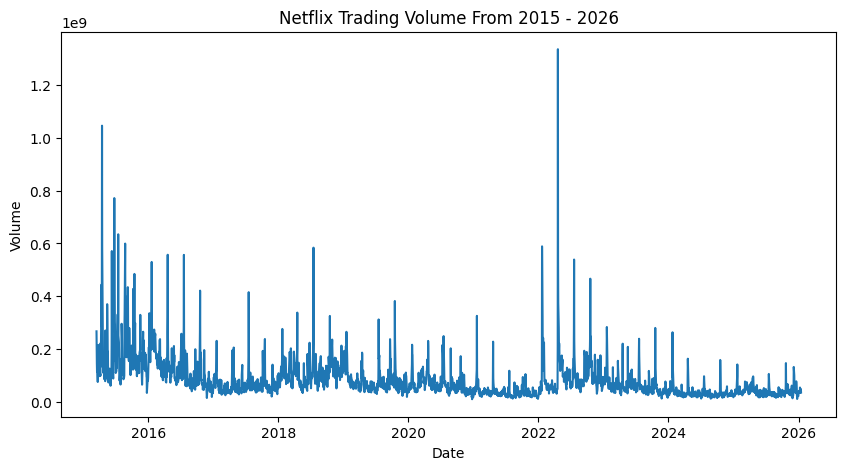

In [6]:
#Trade of Volume
plt.figure(figsize=(10, 5))
plt.plot(nflx.index, nflx["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Netflix Trading Volume From 2015 - 2026");

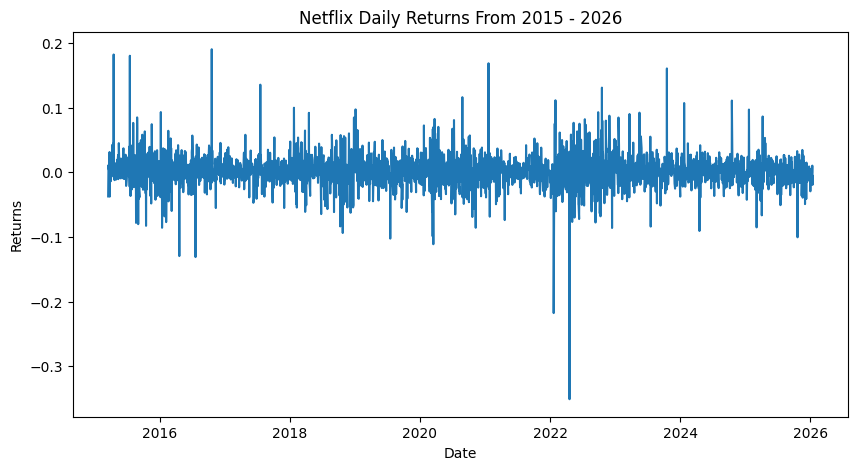

In [7]:
#Daily Returns
plt.figure(figsize=(10, 5))
plt.plot(nflx.index, nflx["Returns"])
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Netflix Daily Returns From 2015 - 2026");

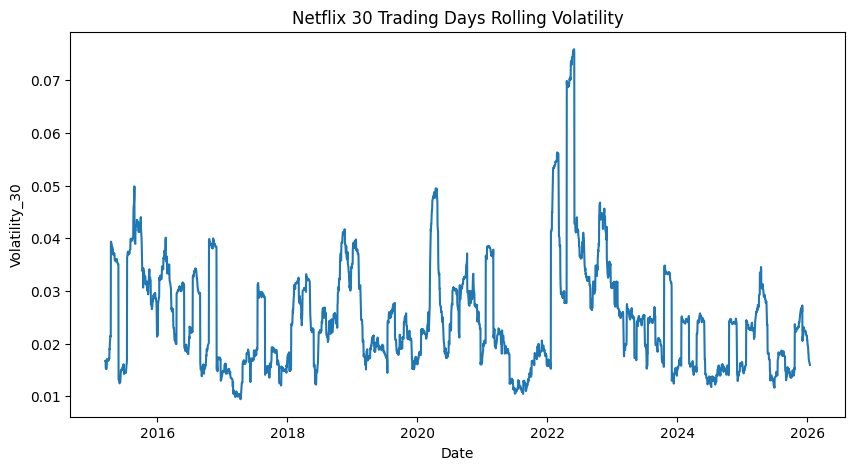

In [8]:
#30 days rolling volatility
plt.figure(figsize=(10, 5))
plt.plot(nflx.index, nflx["Vol_30"])
plt.xlabel("Date")
plt.ylabel("Volatility_30")
plt.title("Netflix 30 Trading Days Rolling Volatility");

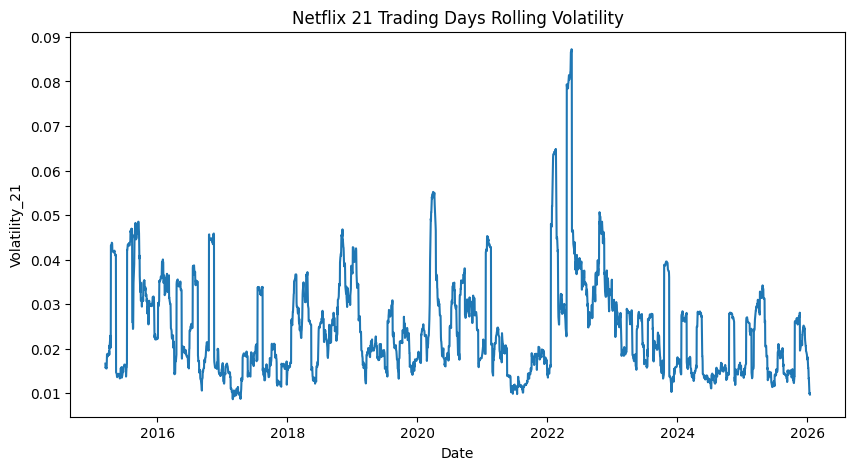

In [9]:
#21 days rolling volatility
plt.figure(figsize=(10, 5))
plt.plot(nflx.index, nflx["Vol_21"])
plt.xlabel("Date")
plt.ylabel("Volatility_21")
plt.title("Netflix 21 Trading Days Rolling Volatility");

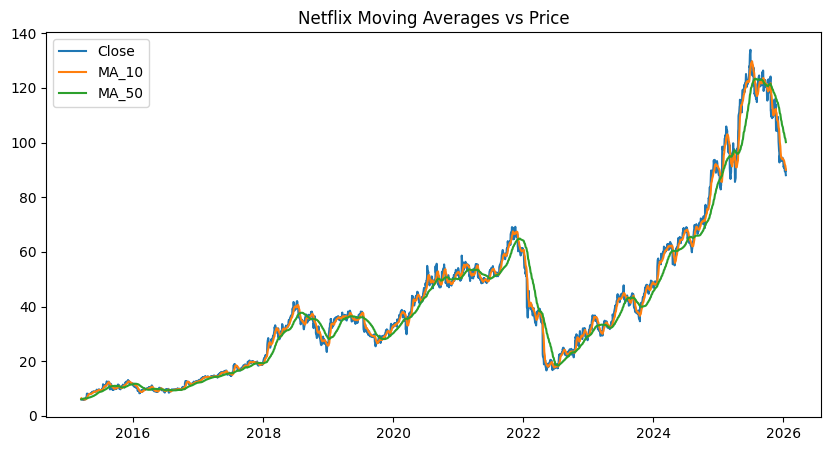

In [10]:
#Trend showing moving averages 10 and 50
plt.figure(figsize=(10, 5))
plt.plot(nflx["Close"], label="Close")
plt.plot(nflx["MA_10"], label="MA_10")
plt.plot(nflx["MA_50"], label="MA_50")
plt.title("Netflix Moving Averages vs Price")
plt.legend();

In [11]:
nflx["Target"] = nflx["Close"].shift(-1)
nflx.dropna(inplace=True)
nflx.head()

,Close,High,Low,Open,Volume,Returns,Vol_21,Vol_30,MA_10,MA_50,Lag_1,Lag_5,Target
Date,,,,,,,,,,,,,
2015-03-16,6.028143,6.154714,5.962000,6.154714,267960000.0,-0.037477,0.016660,0.016735,6.422600,6.071114,6.262857,6.366143,5.978857
2015-03-17,5.978857,6.069429,5.938429,5.971286,184282000.0,-0.008176,0.015731,0.016780,6.342329,6.090994,6.028143,6.215143,6.044571
2015-03-18,6.044571,6.065000,5.930000,5.973857,146349000.0,0.010991,0.015856,0.015418,6.275686,6.117263,5.978857,6.288429,6.074429
2015-03-19,6.074429,6.121143,6.025571,6.046000,114499000.0,0.004940,0.015614,0.015189,6.215057,6.145749,6.044571,6.404571,6.118571
2015-03-20,6.118571,6.178571,6.089571,6.133714,136416000.0,0.007267,0.015826,0.015272,6.178171,6.174634,6.074429,6.262857,6.071429


In [12]:
features = ["Returns", "Vol_21", "Vol_30", "MA_10", "MA_50", "Lag_1", "Lag_5"]
X = nflx[features]
y = nflx["Target"]

In [13]:
int(len(nflx) * 0.8)

2180

In [14]:
train_size = int(len(nflx) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred = lr.predict(X_test)
y_pred

array([ 43.48836701,  44.21335756,  44.46512519,  44.68621666,
        45.67599758,  46.49260029,  46.55651052,  47.10623317,
        47.46631072,  47.60997696,  47.83584861,  47.92809082,
        47.88234845,  47.81116478,  47.55037197,  46.9629755 ,
        45.94773428,  45.57273932,  45.07709014,  45.09740466,
        45.40533739,  45.90263384,  46.25816159,  47.44073726,
        47.40237124,  47.14696978,  48.03669334,  49.07933094,
        49.0168043 ,  49.06881441,  48.91697411,  48.90533181,
        49.07236141,  49.08542727,  48.83698992,  47.69559794,
        47.03560673,  47.31634579,  47.42490114,  48.05349915,
        48.43408937,  48.07170409,  48.68575979,  49.20095763,
        48.48604325,  48.05539137,  48.36017642,  48.30541687,
        48.39060126,  48.96176964,  52.22713928,  55.20501097,
        56.50710369,  57.25263363,  56.95551333,  56.09313252,
        56.29631443,  56.36716864,  56.18197966,  55.97076293,
        55.86766113,  55.94673671,  56.05613396,  56.00

In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1.4720759396403023
RMSE: 2.129006155463457


In [18]:
naive_pred = X_test['Lag_1']
naive_mae = mean_absolute_error(y_test, naive_pred)

print("Naive MAE:", naive_mae)

Naive MAE: 1.716923109341017


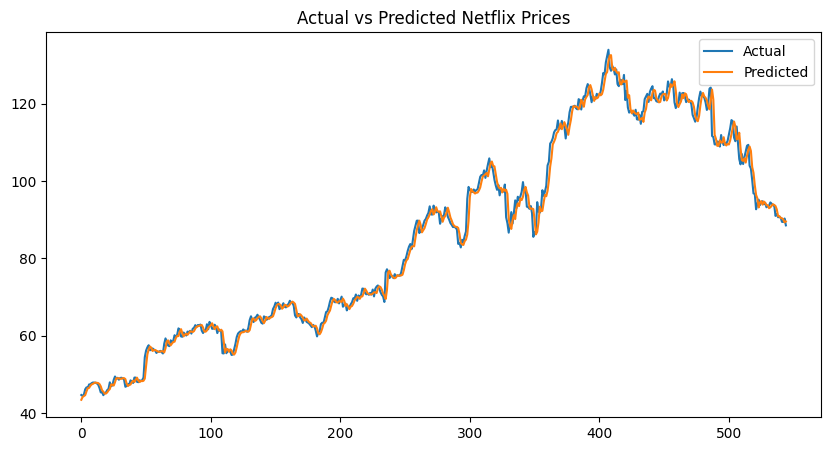

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Netflix Prices")
plt.legend();

In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [20]:
rf_pred = rf.predict(X_test)
rf_pred

array([43.04537284, 43.00317394, 44.61378309, 43.96228358, 44.90993895,
       45.15809822, 45.41302009, 45.30633953, 48.03631609, 48.82720114,
       48.93922401, 48.93922401, 48.93922401, 48.93922401, 48.93922401,
       48.93922401, 48.81655906, 48.72008465, 48.71208101, 47.6367715 ,
       48.69103204, 48.47323632, 48.54020433, 48.50152775, 48.63392282,
       48.66011887, 49.33871425, 49.50409167, 49.70634992, 49.64095167,
       49.6619439 , 49.52367195, 49.65209556, 49.6619439 , 49.65209556,
       49.52367195, 49.48992671, 49.48992671, 49.48992671, 49.48992671,
       49.48992671, 49.48992671, 49.48992671, 49.6619439 , 49.6619439 ,
       49.48992671, 49.48992671, 49.48992671, 49.48992671, 49.50409167,
       49.68542967, 54.05568391, 54.12320854, 58.79368831, 59.08006573,
       54.25436192, 54.39338321, 56.19080804, 54.58471705, 54.14629038,
       54.09368161, 54.15428221, 54.16120623, 54.14629038, 54.09636226,
       54.09368161, 59.28340993, 59.34056981, 59.29012014, 59.22

In [25]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)

MAE: 1.4720759396403023
RMSE: 2.129006155463457


In [26]:
importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importance

Lag_1      0.976015
MA_50      0.019240
MA_10      0.004009
Returns    0.000290
Lag_5      0.000252
Vol_21     0.000103
Vol_30     0.000091
dtype: float64

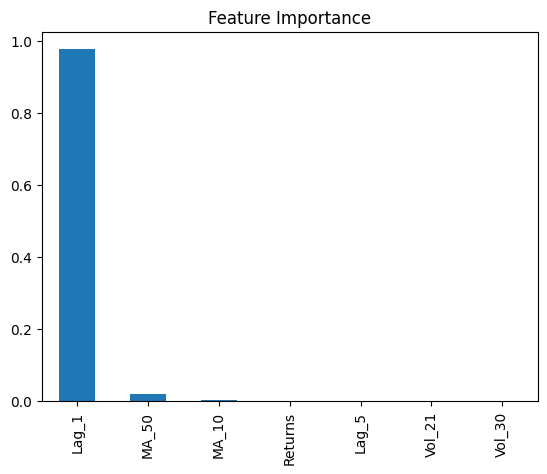

In [27]:
importance.plot(kind='bar', title='Feature Importance')
plt.show()